# Simple Linear Regression

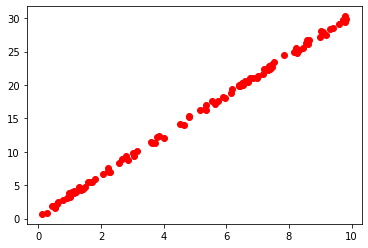

[3.00748342] 0.4557132837157969


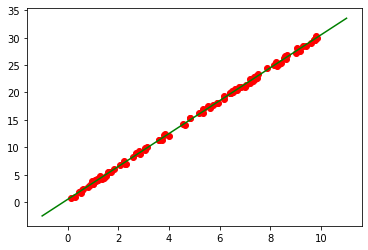

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X=10*np.random.rand(100)
y=3*X + np.random.rand(100)
plt.scatter(X, y, color="r")
plt.show()

from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
X=X.reshape(-1, 1)
lin_reg.fit(X, y)
print(lin_reg.coef_, lin_reg.intercept_)
X_fit=np.linspace(-1, 11)
X_fit=X_fit.reshape(-1, 1)
y_fit=lin_reg.predict(X_fit)
plt.scatter(X, y, color="r")
plt.plot(X_fit, y_fit, "g-")

In [4]:
import pandas as pd

df=pd.read_csv("Boston.csv")
df.head()
df.info()
column_name=list(df.columns)
column_name.remove("Unnamed: 0")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
crim          506 non-null float64
zn            506 non-null float64
indus         506 non-null float64
chas          506 non-null int64
nox           506 non-null float64
rm            506 non-null float64
age           506 non-null float64
dis           506 non-null float64
rad           506 non-null int64
tax           506 non-null int64
ptratio       506 non-null float64
black         506 non-null float64
lstat         506 non-null float64
medv          506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


### Exploratory Data Analysis(EDA)

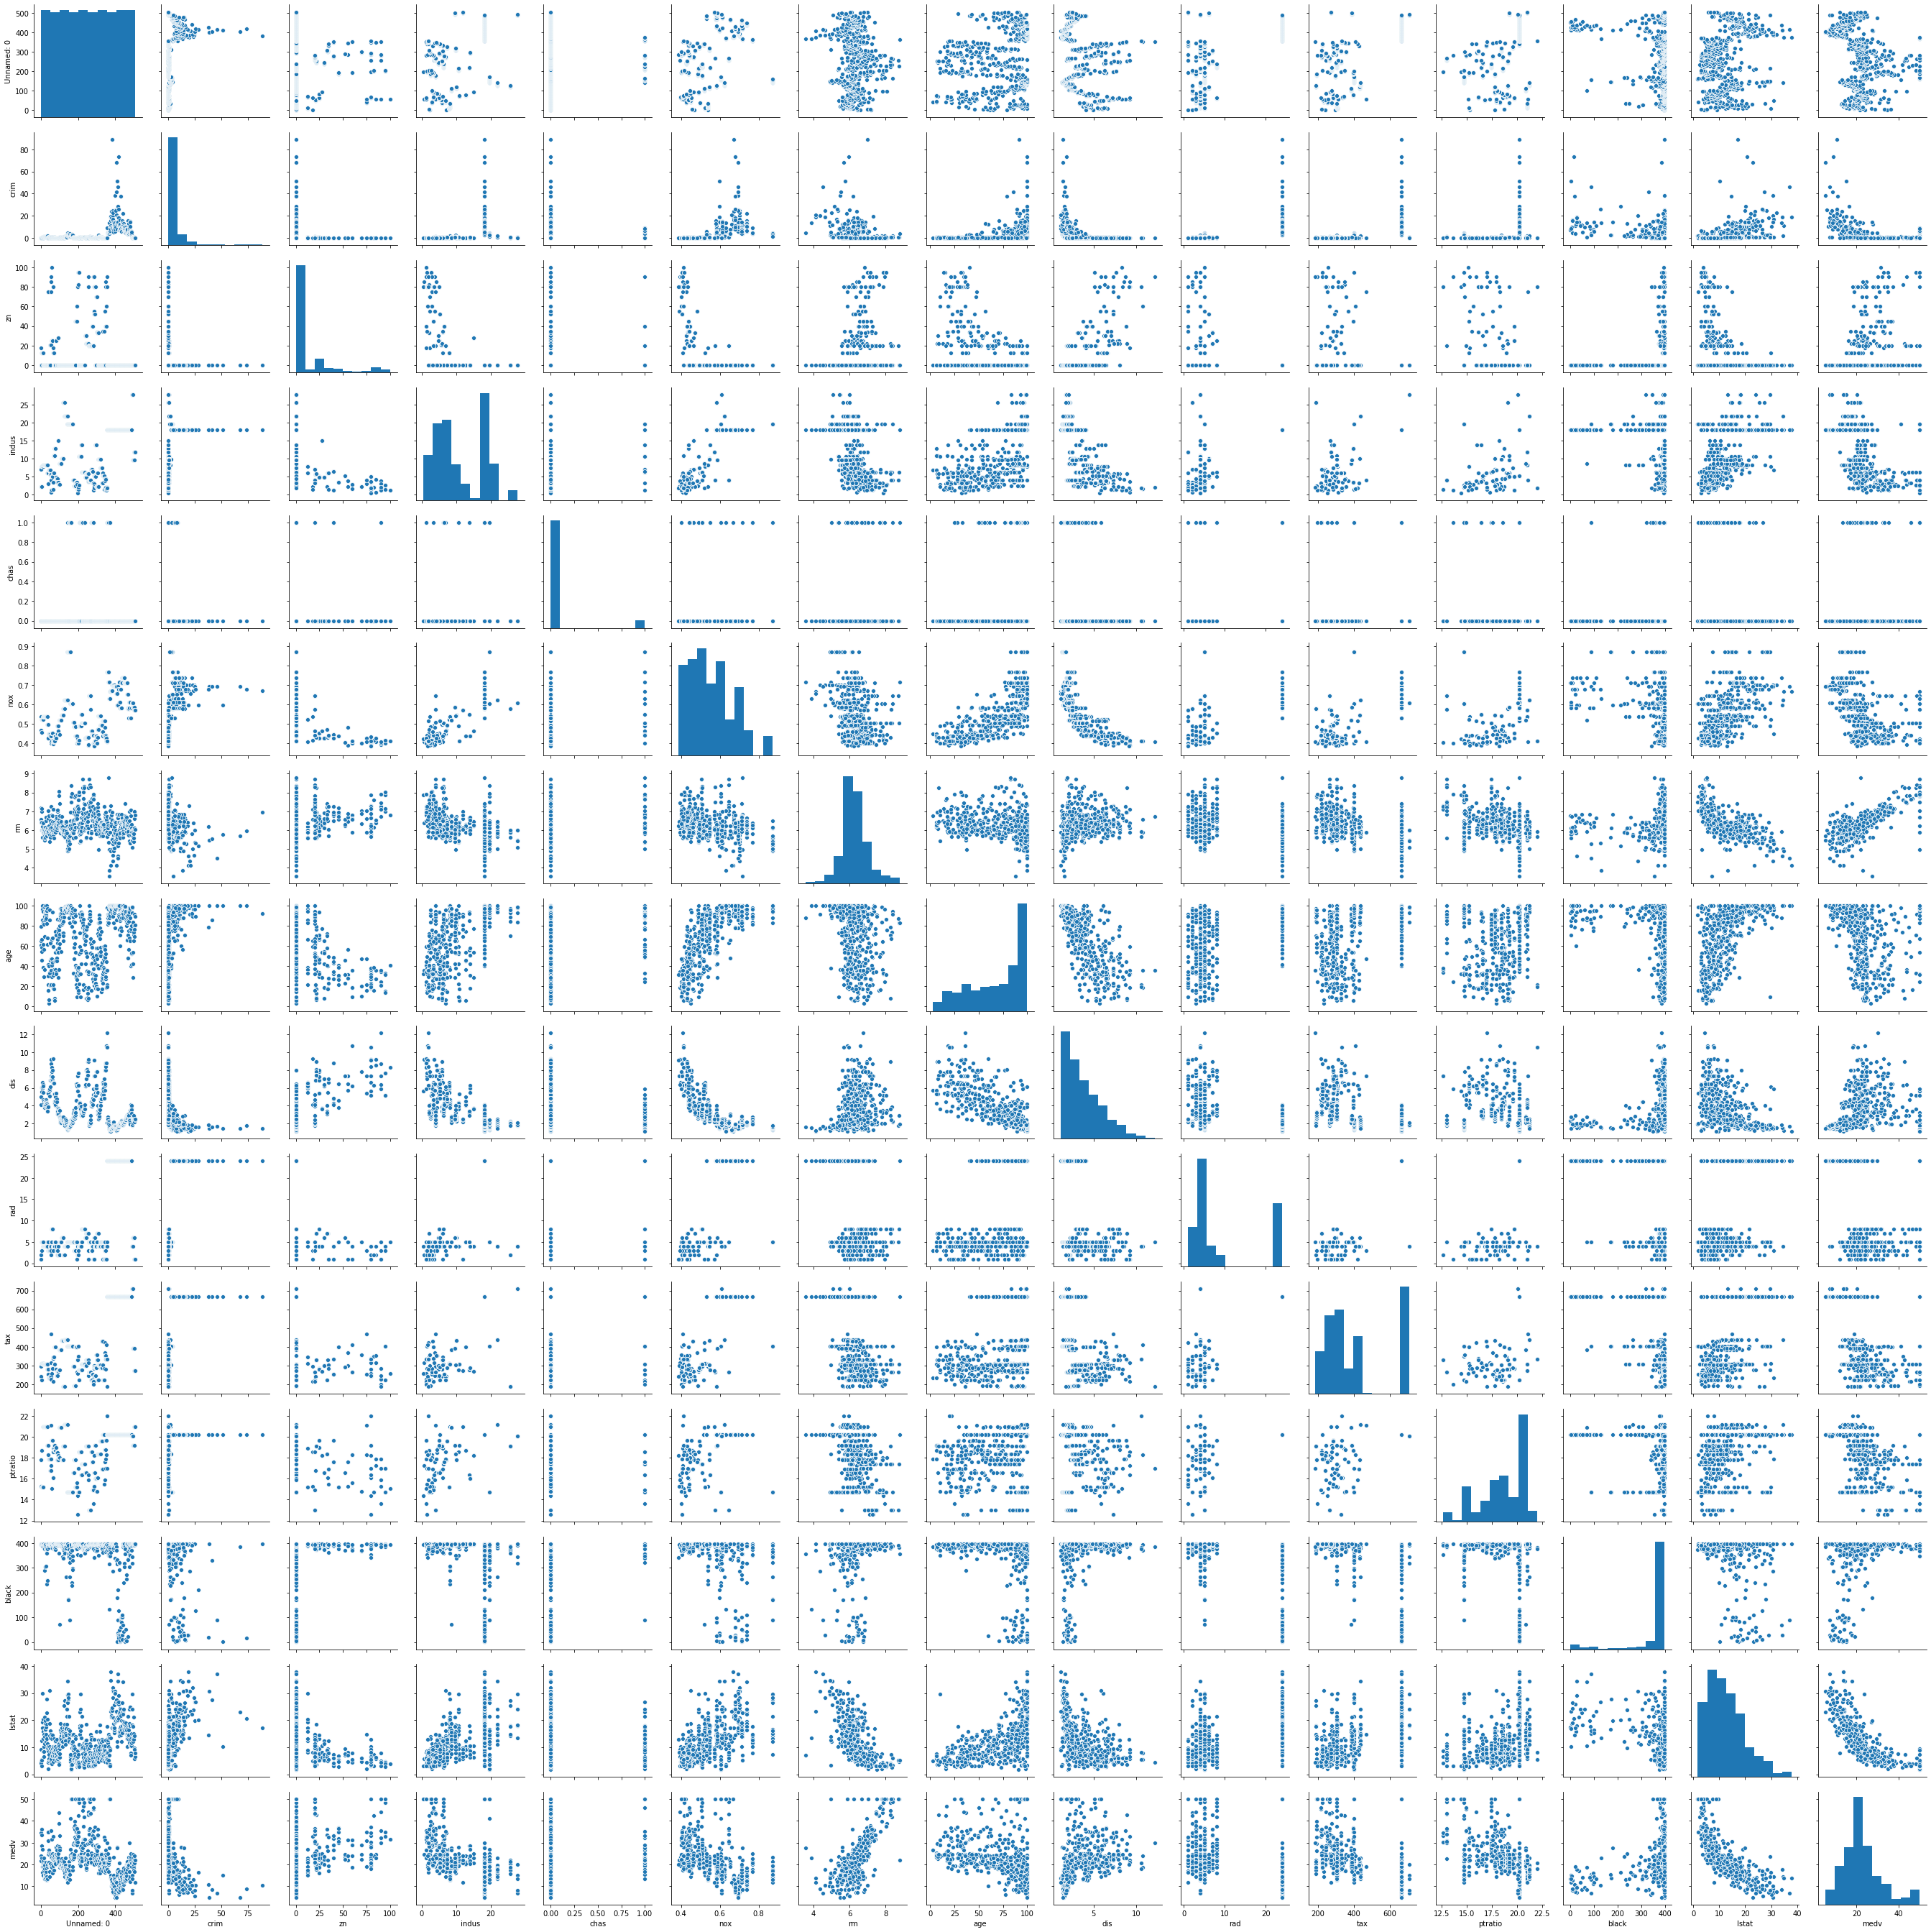

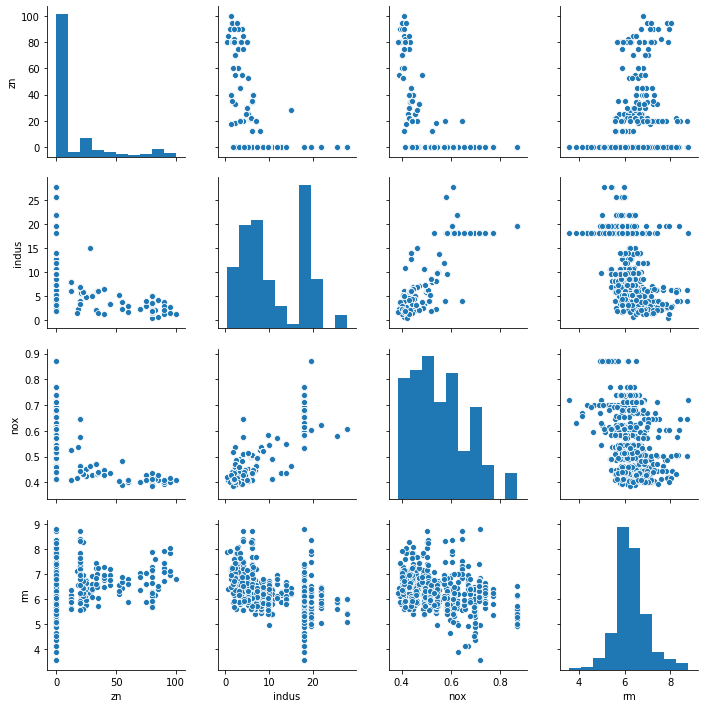

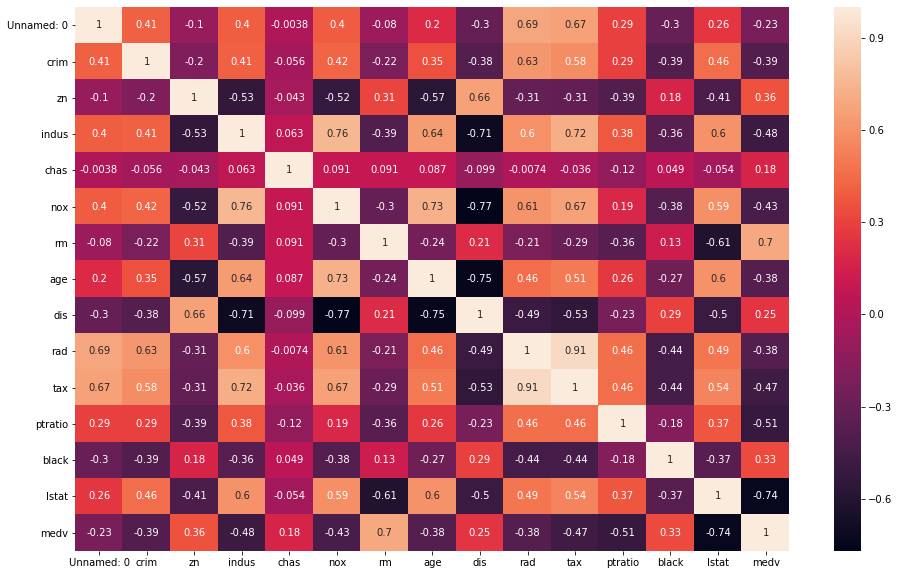

In [5]:
df.describe()
sns.pairplot(df)
col_study=["zn", "indus", "nox", "rm"]
sns.pairplot(df[col_study])
df_corr=df.corr()
df.drop("Unnamed: 0", axis=1, inplace=True)

plt.figure(figsize=(16, 10))
sns.heatmap(df_corr, annot=True)


### Modeling our Data

In [6]:
X=df["rm"].values.reshape(-1, 1)
y=df["medv"].values

reg=LinearRegression()
reg.fit(X, y)
reg.coef_
reg.intercept_



-34.670620776438554

### Visualising your Data

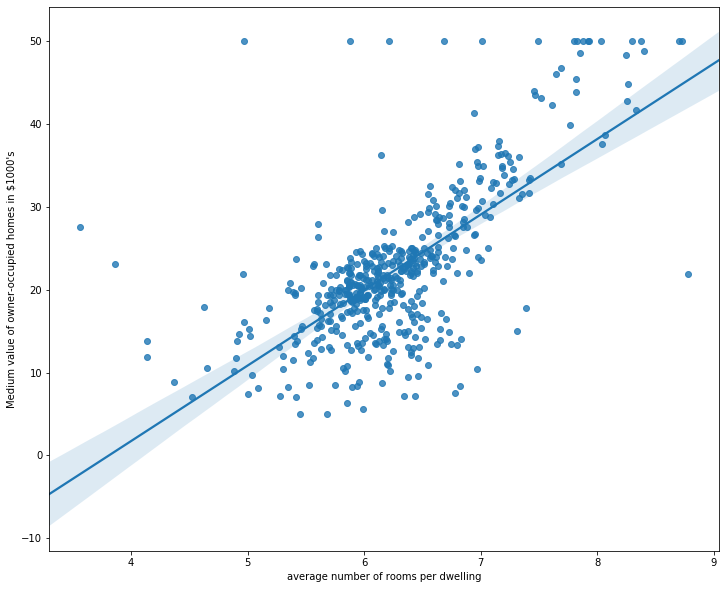

C:\Users\AMIT\Anaconda3\anacondapy\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


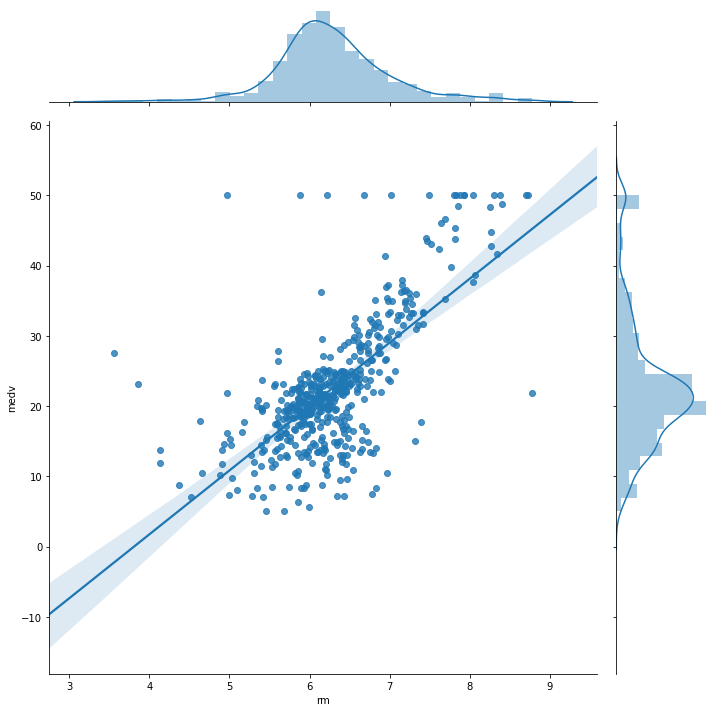

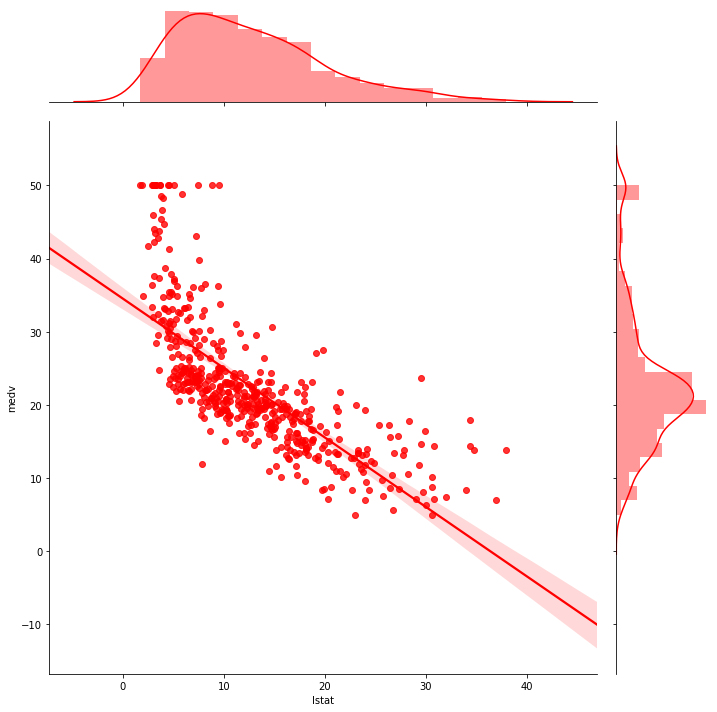

In [7]:
plt.figure(figsize=(12, 10))
sns.regplot(X, y)
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Medium value of owner-occupied homes in $1000's")
plt.show()
sns.jointplot(x="rm", y="medv", data=df, kind="reg", size=10)
plt.show()

sns.jointplot(x="lstat", y="medv", data=df, kind='reg', color="red", size=10)
plt.show()

The shades of the lines shows the ammount of regularisation that can be done.

# Robust Regression

###### It helps to deal with the outliers

## RANdom SAmple Consensus(RANSAC) Algorithm

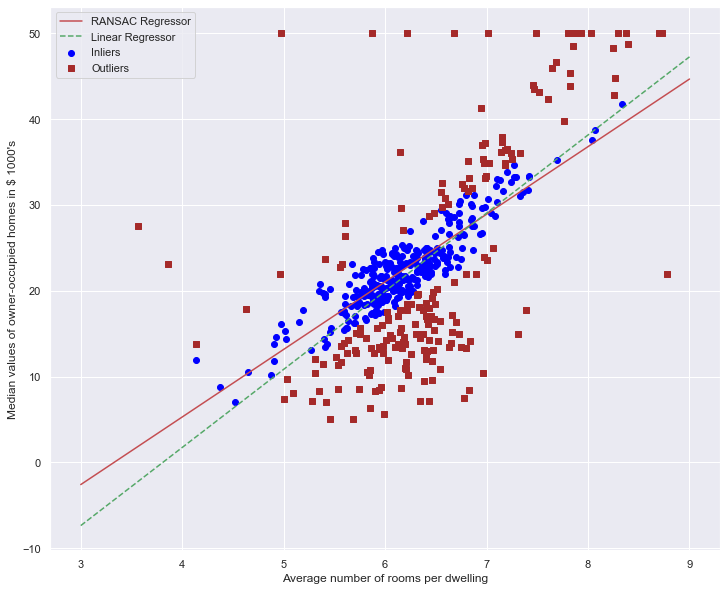

In [8]:
from sklearn.linear_model import RANSACRegressor
ransac=RANSACRegressor()
ransac.fit(X, y)
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

line_x=np.arange(3, 10, 1)
line_x_ransac=ransac.predict(line_x.reshape(-1, 1))

"""Comparing RANSAC Regressor with the linear regressor"""

sns.set(style="darkgrid", context="notebook")
plt.figure(figsize=(12, 10))
plt.scatter(X[inlier_mask], y[inlier_mask], c="blue", marker="o", 
            label="Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], c="brown", marker="s",
            label="Outliers")
plt.plot(line_x, line_x_ransac, "r-", label="RANSAC Regressor")
plt.plot(line_x, reg.predict(line_x.reshape(-1, 1)), "g--", 
         label="Linear Regressor")
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Median values of owner-occupied homes in $ 1000's")
plt.legend()
plt.show()

### Evaluating your Model

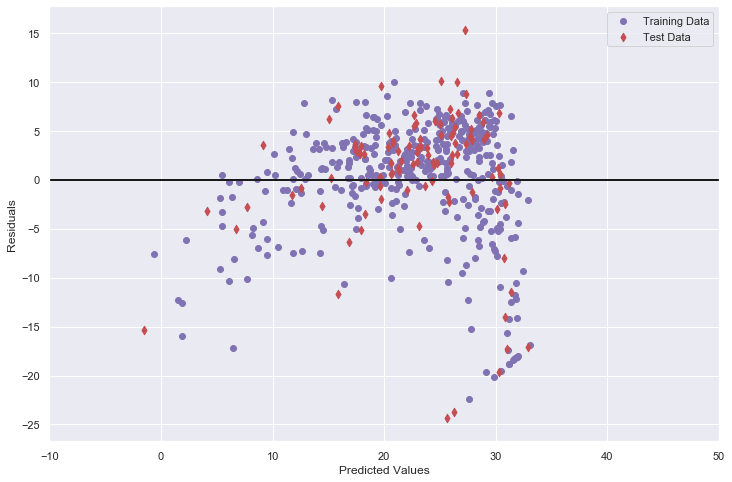

In [9]:
"""Splitting of the data"""

from sklearn.model_selection import train_test_split

X=df["lstat"].values.reshape(-1, 1)
y=df["medv"].values

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  random_state=0)

reg=LinearRegression()
reg.fit(X_train, y_train)

y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)

"""Using Residuals for Evaluation"""

plt.figure(figsize=(12, 8))
plt.scatter(y_train_pred, y_train_pred-y_train, c="m", marker="o", 
            label="Training Data")
plt.scatter(y_test_pred, y_test_pred-y_test, c="r", marker="d", 
            label="Test Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color="k")
plt.xlim([-10, 50])
plt.show()

In [14]:
"""Using Mean Squared Error(MSE)"""

from sklearn.metrics import mean_squared_error 
print("mean squared error(train set): {:.1f}".format(mean_squared_error(y_train, y_train_pred)))
print("mean squared error(test set): {:.1f}".format(mean_squared_error(y_test, y_test_pred)))

"""Using Coefficient of Determination, R^2"""

from sklearn.metrics import r2_score
print("r2_score(train set): {:.1f}".format(r2_score(y_train, y_train_pred)))
print("r2_score(test set): {:.1f}".format(r2_score(y_test, y_test_pred)))

mean squared error(train set): 36.5
mean squared error(test set): 46.3
r2_score(train set): 0.6
r2_score(test set): 0.4
